In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
def safelog(x):
    return(np.log(x + 1e-100))

## Derive Data

In [2]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")
N = data_set.shape[0]-1
x_all = sorted([p[1] for p in data_set[1::]])
y_all = sorted([p[1] for p in data_set[1::]])

bin_width = 3
origin = 0

# put first 100 points into training arrays and rest of the 33 points to test arrays
train = np.array(data_set[1:101])
x_train = ([p[0] for p in train])
y_train = ([p[1] for p in train])

test = np.array(data_set[101:134])
x_test = ([p[0] for p in test])
y_test = ([p[1] for p in test])


train_mean = np.mean(train)
test_mean = np.mean(test)

K = max(y_train)

min_x = min(x_all)
max_x= max(x_all)


minval=0
maxval=60

Text(0.5, 1.0, 'h=3')

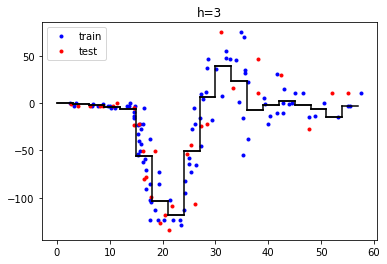

In [3]:
data_interval = np.arange(minval,maxval,0.001)
left = np.arange(minval, maxval -bin_width, bin_width)
right = np.arange(minval + bin_width, maxval, bin_width)

p_hat=[]
for a in range(len(left)):
    part = (left[a] < x_train) & (x_train <= right[a])
    p_hat.append(sum((part)*y_train)/ (np.sum(part)))
p_hat=np.array(p_hat)


plt.plot(x_train,y_train,'.b',label="train")
plt.plot(x_test,y_test,'.r',label="test")
for a in range(len(left)-1):
    plt.plot([left[a], right[a]], [p_hat[a], p_hat[a]],color="black" )
    plt.plot([right[a], right[a]], [p_hat[a], p_hat[a + 1]], color="black")  
    
#plots the last unplotted line
plt.plot([left[::-1], right[::-1]], [p_hat[::-1], p_hat[::-1]],color="black" )
plt.legend(loc="upper left")
plt.title("h=3")


In [7]:
def rmse(p_hat, p_type):
    rmse = 0 
    if p_type == "Regressogram" :
        for i in range (len(left)): 
            part = [(left[i] < x_test[a]) & (x_test[a] <= right[i]) for a in range (len(x_test))]
            for truth in part:
                if truth:
                    difference = y_test[i] - p_hat[int((x_test[i])/bin_width)]
                    rmse = rmse + difference*difference
        
        rmse = math.sqrt(rmse/len(x_test))
        print(p_type ,"RMSE is ",rmse," when h is", bin_width)
       
    else:
        for i in range (len(x_test)):
            diff = y_test[i] - p_hat[(x_test[i]-minval)*1000+1]
            rmse = rmse + diff*diff
    
        rmse = sqrt(rmse/length(x_test))
        print(p_type ,"RMSE is ",rmse," when h is", bin_width)
    return rmse
  

In [8]:
#calculate regressogram
rmse1 = rmse(p_hat,"Regressogram")

Regressogram RMSE is  28.96065633310612  when h is 3


In [9]:
rmse2 = rmse(p_hat,"Kernel")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices